### Hypothesis ###
"Based on historical performance data and advanced metrics from previous seasons, it is possible to predict the winner of the upcoming La Liga season with reasonable accuracy."

1. Who is most likely to win the LaLiga this year based on the previous 10 years?
2. Who are the 2 teams that will most likely be relegated?
3. Which team is most likely to finish 5th?

In [8]:
import pandas as pd

In [9]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [13]:
full_data = pd.read_csv("la_liga_2015_2025_league_table.csv")
print(full_data.shape)
full_data.head()

(200, 20)


,rk,squad,mp,w,d,l,gf,ga,gd,pts,pts/mp,attendance,top_team_scorer,goalkeeper,notes,season,xg,xga,xgd,xgd/90
0,1,Barcelona,38,29,4,5,112,29,83,91,2.39,74655.0,Luis Suárez - 40,Claudio Bravo,→ Champions League via league finish,2015,NaN,NaN,NaN,NaN
1,2,Real Madrid,38,28,6,4,110,34,76,90,2.37,71265.0,Cristiano Ronaldo - 35,Keylor Navas,→ Champions League via Champions League win,2015,NaN,NaN,NaN,NaN
2,3,Atlético Madrid,38,28,4,6,63,18,45,88,2.32,46902.0,Antoine Griezmann - 22,Jan Oblak,→ Champions League via league finish,2015,NaN,NaN,NaN,NaN
3,4,Villarreal,38,18,10,10,44,35,9,64,1.68,17660.0,Cédric Bakambu - 12,Alphonse Areola,→ Champions League via league finish,2015,NaN,NaN,NaN,NaN
4,5,Athletic Club,38,18,8,12,58,45,13,62,1.63,41917.0,Aritz Aduriz - 20,Gorka Iraizoz,→ Europa League via league finish,2015,NaN,NaN,NaN,NaN


## Exploratory Data Analysis


In [ ]:
# show how many times each team appears in the dataset
full_data['squad'].value_counts()

squad
Barcelona          10
Real Madrid        10
Atlético Madrid    10
Villarreal         10
Athletic Club      10
Celta Vigo         10
Sevilla            10
Real Sociedad      10
Betis              10
Valencia           10
Getafe              9
Espanyol            8
Alavés              8
Osasuna             7
Levante             6
Rayo Vallecano      6
Eibar               6
Granada             6
Valladolid          5
Las Palmas          5
Girona              5
Leganés             5
Mallorca            5
Cádiz               4
Málaga              3
La Coruña           3
Elche               3
Sporting Gijón      2
Huesca              2
Almería             2
Name: count, dtype: int64

In [ ]:
# show how often each team finished at each rank, then view top entries
full_data['squad'].groupby(full_data['rk']).value_counts().head(10)

rk  squad          
1   Barcelona          5
    Real Madrid        4
    Atlético Madrid    1
2   Barcelona          4
    Real Madrid        4
    Atlético Madrid    2
3   Atlético Madrid    6
    Real Madrid        2
    Barcelona          1
    Girona             1
Name: count, dtype: int64

In [ ]:
import plotly.express as px

# prepare finishing counts for teams in top 3 positions over last seasons

ranking_counts = full_data['squad'].groupby(full_data['rk']).value_counts().reset_index(name = 'count')

ranking_counts = ranking_counts[ranking_counts['rk'].isin([1,2,3])]

# plot bar chart of top 3 finishes by team

fig = px.bar(ranking_counts, x='squad', y='count', color='rk',
             barmode='group',
             title='Top 3 Finishes by Team and Rank (Last 10 Years)',
             labels={'squad': 'Team', 'count': 'Finish Count', 'rk': 'Position'})

fig.update_layout(xaxis={'categoryorder' : 'total descending'})

fig.show()

In [ ]:
import plotly.express as px

ranking_counts = full_data['squad'].groupby(full_data['rk']).value_counts().reset_index(name = 'count')

# prepare finishing counts specifically for teams finishing in 5th place

ranking_counts = ranking_counts[ranking_counts['rk'].isin([5])]

# plot bar chart of 5th place finishes

fig = px.bar(ranking_counts, x='squad', y='count', color='rk',
             barmode='group',
             title='Top 3 Finishes by Team and Rank (Last 10 Years)',
             labels={'squad': 'Team', 'count': 'Finish Count', 'rk': 'Position'})

fig.update_layout(xaxis={'categoryorder' : 'total descending'})

fig.show()

In [ ]:
import plotly.express as px

ranking_counts = full_data['squad'].groupby(full_data['rk']).value_counts().reset_index(name = 'count')

# prepare counts for bottom two league finishes (19th and 20th)

ranking_counts = ranking_counts[ranking_counts['rk'].isin([19,20])]

# plot bar chart of bottom two finishes

fig = px.bar(ranking_counts, x='squad', y='count', color='rk',
             barmode='group',
             title='Top 3 Finishes by Team and Rank (Last 10 Years)',
             labels={'squad': 'Team', 'count': 'Finish Count', 'rk': 'Position'})

fig.update_layout(xaxis={'categoryorder' : 'total descending'})

fig.show()

In [ ]:
# get basic descriptive statistics for numeric fields
full_data.describe()

,rk,mp,w,d,l,gf,ga,gd,pts,pts/mp,attendance,season,xg,xga,xgd,xgd/90
count,200.000000,200.0,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,184.000000,200.000000,160.00000,160.000000,1.600000e+02,160.000000
mean,10.500000,38.0,14.025000,9.950000,14.02500,49.845000,49.845000,0.000000,52.025000,1.369400,26416.288043,2019.500000,48.84250,48.843750,4.440892e-17,-0.000312
std,5.780751,0.0,6.087666,2.872063,5.42045,16.886585,13.062701,25.571459,17.146556,0.450993,17914.746945,2.879489,11.62082,8.621326,1.712988e+01,0.450948
min,1.000000,38.0,3.000000,2.000000,1.00000,24.000000,18.000000,-64.000000,16.000000,0.420000,91.000000,2015.000000,29.30000,32.500000,-3.300000e+01,-0.870000
25%,5.750000,38.0,10.000000,8.000000,10.75000,39.000000,41.750000,-16.000000,41.000000,1.080000,13484.000000,2017.000000,40.57500,42.875000,-1.100000e+01,-0.290000
50%,10.500000,38.0,13.000000,10.000000,15.00000,46.000000,50.000000,-6.000000,48.000000,1.260000,19957.000000,2019.500000,45.85000,48.300000,-3.150000e+00,-0.080000
75%,15.250000,38.0,17.250000,12.000000,18.00000,57.000000,57.250000,13.000000,61.000000,1.610000,37320.500000,2022.000000,53.97500,54.425000,1.100000e+01,0.292500
max,20.000000,38.0,29.000000,18.000000,30.00000,116.000000,94.000000,83.000000,95.000000,2.500000,83498.000000,2024.000000,91.50000,76.200000,4.950000e+01,1.300000


In [ ]:
# list seasons where each team was champion, along with key stats
winning_team = full_data[full_data["rk"] == 1] [["season", "squad", "pts", "pts/mp", "gd"]].sort_values("season")

print(winning_team)

     season            squad  pts  pts/mp  gd
0      2015        Barcelona   91    2.39  83
20     2016      Real Madrid   93    2.45  65
40     2017        Barcelona   93    2.45  70
60     2018        Barcelona   87    2.29  54
80     2019      Real Madrid   87    2.29  45
100    2020  Atlético Madrid   86    2.26  42
120    2021      Real Madrid   86    2.26  49
140    2022        Barcelona   88    2.32  50
160    2023      Real Madrid   95    2.50  61
180    2024        Barcelona   88    2.32  63


In [ ]:
# select champion teams from seasons since 2015
winning_team_past_10_years = full_data[(full_data['rk'] == 1) & (full_data["season"]>= 2015)]

# calculate average points per match for those champions

avg_pts_mp_winning_team = winning_team_past_10_years["pts/mp"].mean()

print(f"Average pts/mp for past 10 winning teams: {avg_pts_mp_winning_team:.2f}")

Average pts/mp for past 10 winning teams: 2.35


In [ ]:
# add column to mark champions for convenience
full_data["is_champion"] = (full_data["rk"] == 1).astype(int)

# filter dataset to include only champions

champions_only = full_data[full_data["is_champion"] == 1]

full_data.head()

,rk,squad,mp,w,d,l,gf,ga,gd,pts,pts/mp,attendance,top_team_scorer,goalkeeper,notes,season,xg,xga,xgd,xgd/90,is_champion,games_left,projected_pts
0,1,Barcelona,38,29,4,5,112,29,83,91,2.39,74655.0,Luis Suárez - 40,Claudio Bravo,→ Champions League via league finish,2015,NaN,NaN,NaN,NaN,1,0,91.0
1,2,Real Madrid,38,28,6,4,110,34,76,90,2.37,71265.0,Cristiano Ronaldo - 35,Keylor Navas,→ Champions League via Champions League win,2015,NaN,NaN,NaN,NaN,0,0,90.0
2,3,Atlético Madrid,38,28,4,6,63,18,45,88,2.32,46902.0,Antoine Griezmann - 22,Jan Oblak,→ Champions League via league finish,2015,NaN,NaN,NaN,NaN,0,0,88.0
3,4,Villarreal,38,18,10,10,44,35,9,64,1.68,17660.0,Cédric Bakambu - 12,Alphonse Areola,→ Champions League via league finish,2015,NaN,NaN,NaN,NaN,0,0,64.0
4,5,Athletic Club,38,18,8,12,58,45,13,62,1.63,41917.0,Aritz Aduriz - 20,Gorka Iraizoz,→ Europa League via league finish,2015,NaN,NaN,NaN,NaN,0,0,62.0


In [ ]:
# compute mean pts/mp across all champions
mean_pts_mp = champions_only["pts/mp"].mean()

print(f"Mean of 'pts/mp': {mean_pts_mp:.2f}")

Mean of 'pts/mp': 2.35


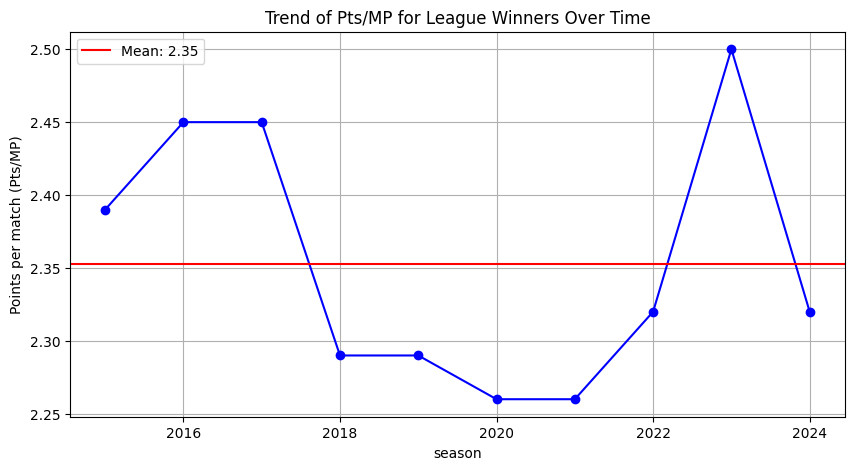

In [ ]:
# plot champions' pts/mp over time with overall average line
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(champions_only["season"], champions_only["pts/mp"], marker = "o", linestyle = "-", color = "b")
plt.axhline(y=mean_pts_mp, color = 'r', linestyle = '-', label = f'Mean: {mean_pts_mp:.2f}')
plt.xlabel("season")
plt.ylabel("Points per match (Pts/MP)")
plt.title("Trend of Pts/MP for League Winners Over Time")
plt.grid(True)
plt.legend()
plt.show()

## ML Modelling & Predictions


In [95]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, log_loss
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np

In [ ]:
# calculate games remaining for each team in the season
full_data["games_left"] = 38 - full_data["mp"]

# project season-end points based on current points per match
full_data["projected_pts"] = full_data["pts"] + full_data["games_left"] * full_data["pts/mp"]

# create target column: 1 if champion, 0 otherwise
full_data["is_champion"] = (full_data["rk"] == 1).astype(int)


In [ ]:
# define feature columns for model training
features = ["pts/mp", "gd", "w", "l", "projected_pts"]

1. Precision : The proportion of correctly predicted positive cases out of all cases predicted as positive.
2. Recall : The proportion of correctly predicted positive cases out of all actual positive cases.
3. F1-score : The harmonic mean of precision and recall, balancing both metrics into a single score.
4. Support : The number of actual occurrences of each class in the dataset.
5. Confusion Matrix : A table showing true vs. predicted classifications, detailing correct and incorrect predictions for each class.

In [ ]:
# prepare training data: seasons 2015–2023
df_train = full_data[(full_data["season"] >= 2015) & (full_data["season"] <= 2023)]

In [ ]:
# prepare test data: season 2024
df_test = full_data[full_data["season"] == 2024].copy()

In [ ]:
# split into features (X) and target (y)
X_train = df_train[features]

y_train = df_train["is_champion"]

X_test = df_test[features]

In [ ]:
# initialize random forest classifier
model = RandomForestClassifier(n_estimators=200, random_state=42)

# fit model to training data
model.fit(X_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
# make predictions on 2024 test set
test_pred = model.predict(X_test)

test_prob = model.predict_proba(X_test)[:, 1]


# calculate model performance metrics
accuracy = accuracy_score(df_test["is_champion"], test_pred)

roc_auc = roc_auc_score(df_test["is_champion"], test_prob)

logloss = log_loss(df_test["is_champion"], test_prob)

In [ ]:
# display test performance results
print(f"\nModel Performance on 2024 Season (Test Set)")

print(f"Accuracy: {accuracy:.3f}")

print(f"Roc_Auc: {roc_auc:.3f}")

print(f"Log Loss: {logloss:.3f}")

print("\nClassification Report:")

print(classification_report(df_test["is_champion"], test_pred))

print("Confusion Matrix:")

print(confusion_matrix(df_test["is_champion"], test_pred))


Model Performance on 2024 Season (Test Set)
Accuracy: 1.000
Roc_Auc: 1.000
Log Loss: 0.023

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00         1

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Confusion Matrix:
[[19  0]
 [ 0  1]]


In [ ]:
# select recent years for pre-season projection
recent_years = [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]
recent_data = full_data[full_data["season"].isin(recent_years)]

# aggregate team stats over recent years
team_stats = recent_data.groupby("squad").agg({
    "pts/mp": "mean",
    "gd": "mean",
    "w": "mean",
    "l": "mean"
}).reset_index()

# project points for a full 38-game season
team_stats["projected_pts"] = team_stats["pts/mp"] * 38  # Project for full season

# prepare 2025–2026 feature set
X_2025_2026 = team_stats[features]

In [ ]:
# predict win probabilities for each team
team_stats["win_probability"] = model.predict_proba(X_2025_2026)[:, 1]

# normalize probabilities into percentages
team_stats["win_probability (%)"] = (team_stats["win_probability"] / team_stats["win_probability"].sum()) * 100

team_stats["win_probability (%)"] = team_stats["win_probability (%)"].round(3)

In [107]:
# sort by projected points for display
team_stats = team_stats.sort_values("projected_pts", ascending=False)

# display pre-season predictions
print("\n2025-2026 Championship Win Probabilities")

print(team_stats[["squad", "projected_pts", "pts/mp", "gd", "win_probability (%)"]])

team_stats.head(20)


2025-2026 Championship Win Probabilities
              squad  projected_pts    pts/mp         gd  win_probability (%)
4         Barcelona      85.652000  2.254000  55.900000               79.464
23      Real Madrid      84.094000  2.213000  48.100000               20.536
3   Atlético Madrid      77.710000  2.045000  34.000000                0.000
29       Villarreal      59.964000  1.578000  13.100000                0.000
25          Sevilla      58.900000  1.550000   6.400000                0.000
24    Real Sociedad      56.772000  1.494000   5.800000                0.000
2     Athletic Club      56.164000  1.478000   7.800000                0.000
5             Betis      53.846000  1.417000  -2.500000                0.000
12           Girona      51.756000  1.362000   0.200000                0.000
27         Valencia      50.502000  1.329000  -0.100000                0.000
6        Celta Vigo      46.968000  1.236000  -6.700000                0.000
11           Getafe      45.388889

,squad,pts/mp,gd,w,l,projected_pts,win_probability,win_probability (%)
4,Barcelona,2.254000,55.900000,26.300000,5.000000,85.652000,0.89,79.464
23,Real Madrid,2.213000,48.100000,25.600000,5.100000,84.094000,0.23,20.536
3,Atlético Madrid,2.045000,34.000000,23.000000,6.300000,77.710000,0.00,0.000
29,Villarreal,1.578000,13.100000,16.700000,11.400000,59.964000,0.00,0.000
25,Sevilla,1.550000,6.400000,16.300000,11.700000,58.900000,0.00,0.000
24,Real Sociedad,1.494000,5.800000,15.900000,13.000000,56.772000,0.00,0.000
2,Athletic Club,1.478000,7.800000,15.000000,11.800000,56.164000,0.00,0.000
5,Betis,1.417000,-2.500000,14.600000,13.400000,53.846000,0.00,0.000
12,Girona,1.362000,0.200000,14.400000,15.000000,51.756000,0.00,0.000
27,Valencia,1.329000,-0.100000,13.100000,13.700000,50.502000,0.00,0.000
